In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mnist-digit-recognizer/train.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df= pd.read_csv('/kaggle/input/mnist-digit-recognizer/train.csv')

In [4]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
8025,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df.isna().sum().sum()

np.int64(0)

In [7]:
df.shape

(42000, 785)

In [8]:
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
26827,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


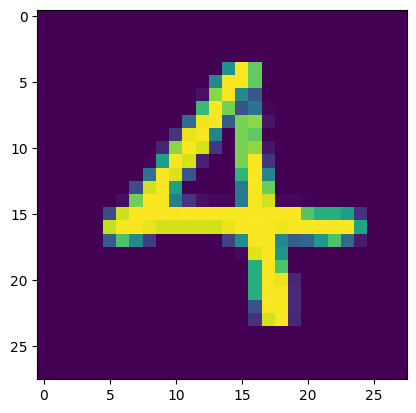

In [9]:
plt.imshow(df.iloc[26820,1:].values.reshape(28, 28))

In [10]:
X= df.iloc[:, 1:]
y= df.iloc[:, 0]

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.2, random_state= 42)

In [12]:
X_train.shape

(33600, 784)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier()

knn.fit(X_train,y_train)

KNeighborsClassifier()

In [14]:
import time
start= time.time()
y_pred= knn.predict(X_test)
print(time.time() - start)

11.398163557052612


In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9648809523809524

In [16]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [17]:
#PCA

from sklearn.decomposition import PCA

pca= PCA(n_components= 100)

X_train_trf= pca.fit_transform(X_train)
X_test_trf= pca.transform(X_test)

In [18]:
X_train_trf.shape

(33600, 100)

In [19]:
knn2= KNeighborsClassifier()
knn2.fit(X_train_trf,y_train)

y_pred2= knn2.predict(X_test_trf)

In [20]:
accuracy_score(y_test,y_pred2)

0.9544047619047619